Import modules to test them

In [1]:
from Data_modules import DataLoader, Visualizer, MissingValuesHandler

Initialize modules

In [2]:
data_loader = DataLoader()
visual = Visualizer()
values_handler = MissingValuesHandler()

Test data loading module. Loaded data from CSV, JSON and API link

In [3]:
url = 'https://docs.google.com/spreadsheets/d/1hZn90v5agxk20bm7xI53SbjfpI-hYKaEQ1ilBHJdr60/gviz/tq?tqx=out:csv&sheet=game_collection_missing'

game_data_csv = data_loader.load_data('Data/game_collection.csv')
game_data_json = data_loader.load_data('Data/game_collection.json')
game_data_api = data_loader.load_data(url)

Check loaded data to make sure it works and loaded data correctly.

In [4]:
print(game_data_csv.describe())

            Pricing        Rating  Number of Ratings
count  61742.000000  61742.000000       61742.000000
mean       7.696369     75.535470         768.549772
std       13.995889     17.549528        3099.924878
min        0.000000      2.000000           7.000000
25%        0.000000     66.000000          17.000000
50%        3.990000     79.000000          43.000000
75%        9.990000     89.000000         186.000000
max      299.900000    100.000000       24635.000000


Check MissingValuesHandler to make sure it works

In [5]:
# Check if data has missing values
missing_values_statistics = values_handler.get_missing_values_statistics(game_data_api)

# Recieve rows with empty values
missing_values = values_handler.get_missing_value_data(game_data_api, 'Rating', True)
# Recieve rows without empty values
presented_values = values_handler.get_presented_value_data(game_data_api, 'Rating', True)

# Check detailed missing values statistics
values_handler.get_column_values_statistics(game_data_api, 'Rating')

# Fill missing data with provided value
filled_game_data = values_handler.fill_missing_values(game_data_api, 'Rating', 'value', 79.0)
print(filled_game_data['Rating'])

                   Total Count  Missing Values  Missing Percentage
Game Title               61742               0                 0.0
Game Genre               61742               0                 0.0
Pricing                  61742               0                 0.0
Developer                61742               0                 0.0
Release Date             61742               0                 0.0
Platform                 61742               0                 0.0
Rating                   61742              64                 0.1
Number of Ratings        61742              64                 0.1
                                    Rating
Missing Amount                         0.0
Presented Amount                     61678
Presented Mode Value    100.0 (2996 times)
Presented Mean Value             75.510085
Presented Median Value                79.0
0        56.0
1        61.0
2        40.0
3        38.0
4        30.0
         ... 
61737    85.0
61738    79.0
61739    89.0
61740    95.0

Check that Visualizer module working.

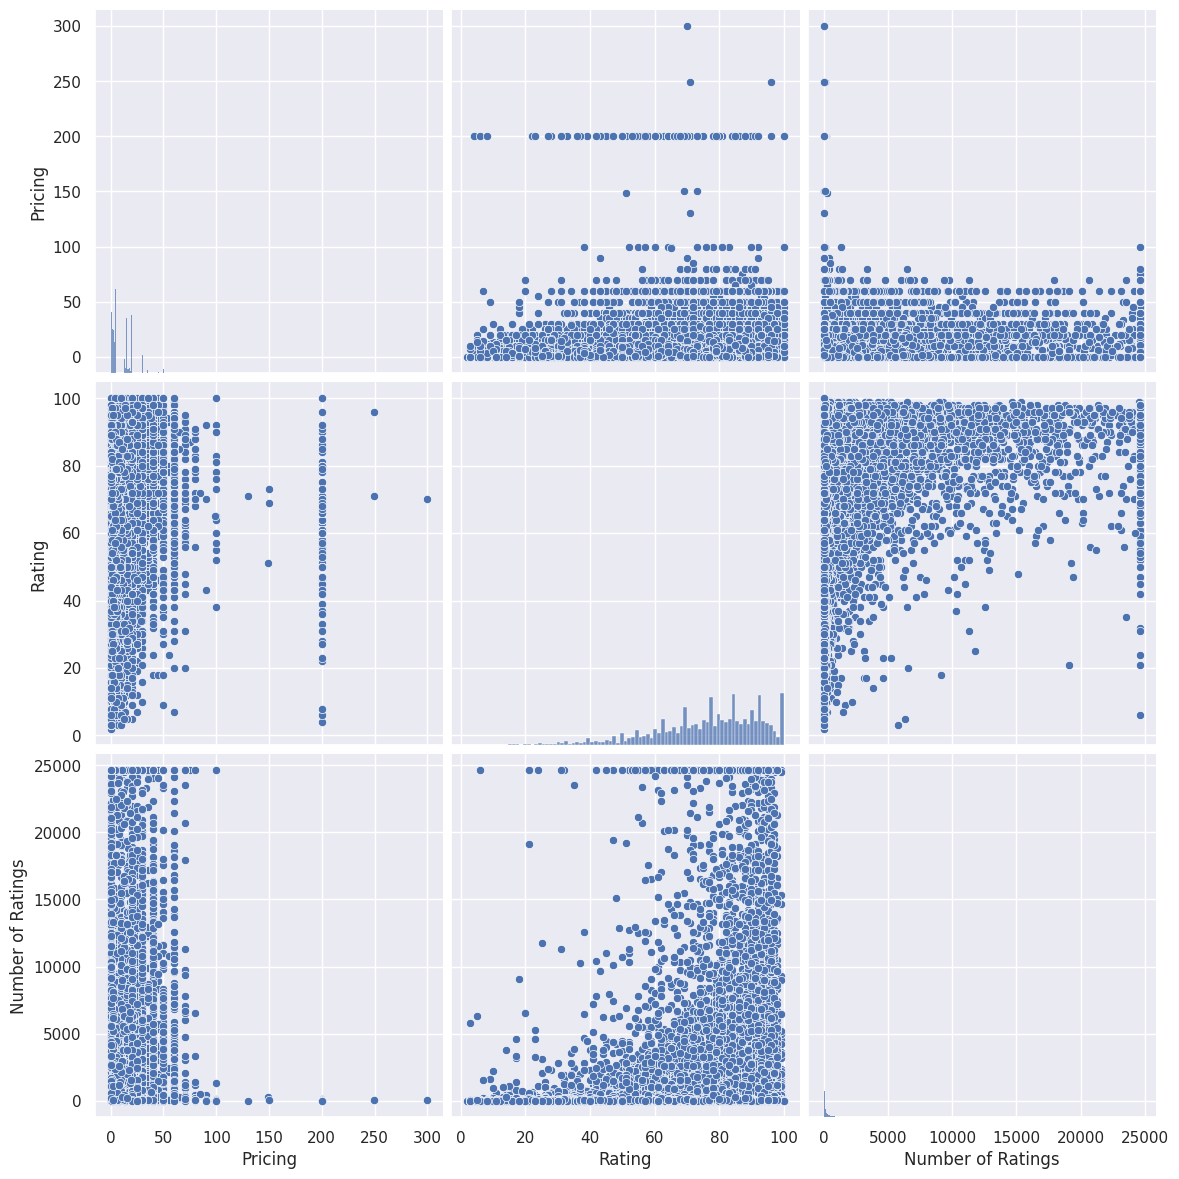

In [6]:
visual.show_pairplot(filled_game_data)